<center>
<div style="border-top: 5px solid white;"></div>

# Introduction

Depuis l’apparition des CD audios, la norme en musique numérique pour avoir une qualité semblable à
de la musique dite analogique, <br> 
est que l’on doit échantillonner à une fréquence **fe** = <font color="red">**44, 1kHz**</font> et quantifier les échantillons à <font color="red">**16 bits**</font>. <br> 
C’est le cas de la plupart des morceaux que l’on peut trouver avec l’extension **.wav**, notamment sur les CD audios. <br> 
Avec l’avènement des baladeurs numériques et d’internet, est apparu le mp3 qui compresse la musique pour que les fichiers soient moins volumineux, et donc plus faciles à stocker ou à transmettre. <br> 
Pour réussir cela, le **mp3** dégrade de manière irréversible le signal pour que les données prennent moins de place. <br> 
Au début, il est clair que la qualité sonore des fichiers **mp3** était bien inférieure à la musique analogique, mais les progrès en compression ont permis au fil du temps de l’améliorer.<br> 
On a vu apparaitre depuis quelques années de la musique numérique dite **Haute Définition** (HD). <br> 
La musique HD se définit par une fréquence d’échantillonnage pouvant aller jusqu’à <font color="red"> **192kHz** </font>, des échantillons quantifiés jusqu’à <font color="red">**24 bits**</font>, et une compression sans pertes. <br> 
Les albums en qualité <font color="orange">**HD**</font> coutent généralement plus chers que les fichiers de qualité standard (appelé par la suite <font color="orange">**SD**</font>, pour **Simple Définition**). <br> 
Mais est-ce que cette différence de prix est justifiée ?<br> 
Le but de ce projet est d’analyser des morceaux de musique <font color="orange">**HD**</font> afin de prouver que la qualité sonore est supérieure (ou pas !) à des morceaux <font color="orange">**SD**</font>.<br> 
</center>

<div style="border-top: 5px solid white;"></div>

# Phase I :

<center>

## Pour cette première partie en autonomie nous devions atteindre plusieur objectif : 
</center>

<ul>

<li>trouver une fonction qui prend un fichier audio au format flac en entrée, et qui affiche ces principales caractéristiques (fréquence d’échantillonnage, nombre de pistes, nombre de bits par échantillon, nombre d’échantillons, durée totale, etc).</li>
<li>trouver une fonction qui prend un fichier audio au format flac en entrée, et rend en sortie les échantillons de chaque piste, et la fréquence d’échantillonage.</li>
<li>écrire une fonction <font color="green"><strong>AFFICHERPISTES</strong></font>, qui prend en entrée le nom d’un fichier flac et affiche la
représentation temporelle et fréquentielle (spectre amplitude seulement) de chaque piste</li>
<li>écrire une fonction <font color="green"><strong>EXTRAITMORCEAU</strong></font>, qui prend en entrée un nom de fichier flac et un entier
x, extrait les x premières secondes du fichier flac, et génère un fichier flac contenant cet extrait.</li>
<li>en utilisant les fonctions ci-dessous, écrire un script qui prend n’importe quel fichier flac stocké
dans le même dossier que votre notebook, affiche ses informations, en extrait quelques secondes,
joue le morceau et enfin affiche les pistes en temps et en fréquence de l’extrait.</li>

</ul>

<div style="border-top: 5px solid white;"></div>

Les fonctions sont dans le même ordre que la liste d'objectif

In [2]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

def aff_flac(fichier):
    # Charger le fichier audio FLAC
    audio, frequence_echantillonnage = sf.read(fichier)
    # Obtenir les informations sur le fichier audio
    nombre_pistes = audio.shape[1] if len(audio.shape) > 1 else 1
    info_fichier = sf.info(fichier)
    nombre_bits_par_echantillon = info_fichier.bits if hasattr(info_fichier, "bits") else None
    nombre_echantillons = audio.shape[0]
    duree_totale = audio.shape[0] / frequence_echantillonnage
    # Afficher les caractéristiques
    print("Caractéristiques du fichier audio:", fichier)
    print("Fréquence d'échantillonnage :", frequence_echantillonnage, "Hz")
    print("Nombre de pistes :", nombre_pistes)
    if nombre_bits_par_echantillon is not None:
        print("Nombre de bits par échantillon :", nombre_bits_par_echantillon)
    print("Nombre d'échantillons :", nombre_echantillons)
    print("Durée totale :", duree_totale, "secondes")

def lire_flac(fichier):
    # Charger le fichier audio FLAC
    audio, frequence_echantillonnage = sf.read(fichier)
    # Renvoyer les échantillons de chaque piste et la fréquence d'échantillonnage
    return audio, frequence_echantillonnage

def afficher_pistes(extrait_audio, frequence_echantillonnage):
    # Obtenir les informations sur le nombre de pistes
    nombre_pistes = extrait_audio.shape[1] if len(extrait_audio.shape) > 1 else 1
    # Créer une grille de sous-graphes avec 2 lignes et 2 colonnes
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    # Piste 1
    piste1_audio = extrait_audio[:, 0] if nombre_pistes > 1 else extrait_audio
    axs[0, 0].plot(np.arange(len(piste1_audio)) / frequence_echantillonnage, piste1_audio, color='purple')
    axs[0, 0].set_title("Piste 1 - Représentation temporelle")
    axs[0, 0].set_xlabel("Temps (s)")
    axs[0, 0].set_ylabel("Amplitude")
    amplitudes_piste1 = np.abs(np.fft.fft(piste1_audio))
    frequences_piste1 = np.fft.fftfreq(len(piste1_audio), 1 / frequence_echantillonnage) 
    axs[0, 1].plot(frequences_piste1, amplitudes_piste1, color='purple')
    axs[0, 1].set_title("Piste 1 - Spectre d'amplitude")
    axs[0, 1].set_xlabel("Fréquence (Hz)")
    axs[0, 1].set_ylabel("Amplitude")
    axs[0, 1].set_xlim(-500, 500) # la fréquence min et max 
    axs[0, 1].set_ylim(0, np.max(amplitudes_piste1) + 1000) # amplitude min et max 
    # Piste 2
    if nombre_pistes > 1:
        piste2_audio = extrait_audio[:, 1]
        axs[1, 0].plot(np.arange(len(piste2_audio)) / frequence_echantillonnage, piste2_audio, color='purple')
        axs[1, 0].set_title("Piste 2 - Représentation temporelle")
        axs[1, 0].set_xlabel("Temps (s)")
        axs[1, 0].set_ylabel("Amplitude")
        
        amplitudes_piste2 = np.abs(np.fft.fft(piste2_audio))
        frequences_piste2 = np.fft.fftfreq(len(piste2_audio), 1 / frequence_echantillonnage) 
        axs[1, 1].plot(frequences_piste2, amplitudes_piste2, color='purple')
        axs[1, 1].set_title("Piste 2 - Spectre d'amplitude")
        axs[1, 1].set_xlabel("Fréquence (Hz)")
        axs[1, 1].set_ylabel("Amplitude")
        axs[1, 1].set_xlim(-500, 500) # la fréquence min et max 
        axs[1, 1].set_ylim(0, np.max(amplitudes_piste2) + 1000) # amplitude min et max 
    
    plt.tight_layout()
    plt.show()
    
def extraire_morceau(fichier, duree_extrait):
    # Charger le fichier audio FLAC
    audio, frequence_echantillonnage = sf.read(fichier)
    # Calculer le nombre d'échantillons nécessaires pour l'extrait
    nombre_echantillons_extrait = int(duree_extrait * frequence_echantillonnage)
    # Extraire l'extrait du fichier audio
    extrait = audio[:nombre_echantillons_extrait]
    # Obtenir le nom du nouveau fichier avec l'extrait
    nom_nouveau_fichier = "extrait_" + str(duree_extrait) + "s_" + fichier
    # Écrire l'extrait dans un nouveau fichier FLAC
    sf.write(nom_nouveau_fichier, extrait, frequence_echantillonnage)
    print(f"Extrait de {duree_extrait} secondes du fichier audio a été extrait dans le fichier : {nom_nouveau_fichier}")

    return extrait, frequence_echantillonnage

<div style="border-top: 5px solid white;"></div>

Voici le script dans lequel je montre toutes les caractéristique demandés, spécifie un temps pour extraire le son et le jouer et d'afficher leur spectre d'amplitude ainsi que leur représentation temporelle.

Caractéristiques du fichier audio: PF_HD_short.flac
Fréquence d'échantillonnage : 44100 Hz
Nombre de pistes : 2
Nombre d'échantillons : 1930551
Durée totale : 43.776666666666664 secondes
Extrait de 5 secondes du fichier audio a été extrait dans le fichier : extrait_5s_PF_HD_short.flac


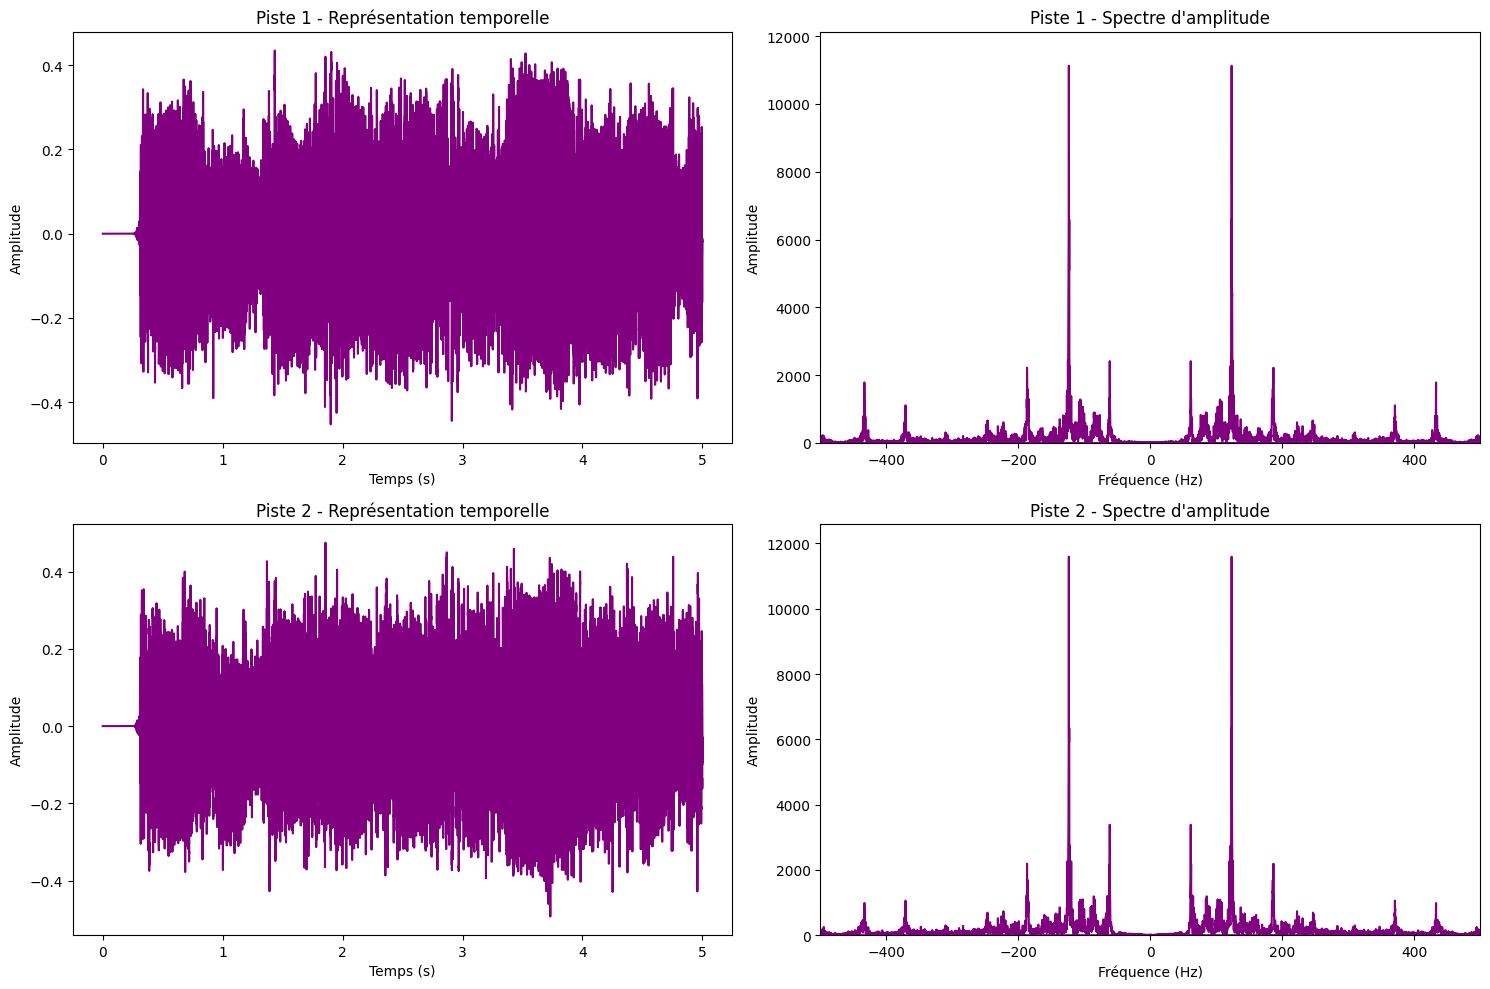

In [4]:
import os
from function import *
import sounddevice as sd

# Chemin vers le fichier FLAC
# ou alors remplacer input("Choose a file : ") par input("Choose a file : ") ou "./PF_HD_short.flac" ou "./AJS_HD_short.flac"
nom_fichier = "PF_HD_short.flac"

# Vérifier si le fichier existe
if os.path.isfile(nom_fichier):
    # Afficher les informations du fichier audio
    aff_flac(nom_fichier)
    # Durée de l'extrait à extraire (en secondes)
    duree_extrait = 5
    # Extraire l'extrait du fichier audio
    extrait_audio, frequence_echantillonnage = extraire_morceau(
        nom_fichier, duree_extrait)
    # Vérifier si l'extrait a été correctement extrait
    if len(extrait_audio) > 0:
        # Jouer l'extrait audio
        sd.play(extrait_audio, frequence_echantillonnage)
        # Attendre la fin de la lecture
        sd.wait()
        afficher_pistes(extrait_audio, frequence_echantillonnage)
    else:
        print("Erreur lors de l'extraction de l'extrait audio.")
else:
    print("Le fichier spécifié n'existe pas.")


<div style="border-top: 5px solid white;"></div>

# Phase II

<center>

## Pour cette 2ème partie nous devons atteindre ces objectifs: 
</center>

<ul>

<li>écrire une fonction <font color="green"><strong>SOUSECHANTILLONAGE</strong></font>, qui réduit d’un facteur f le nombre d’échantillons
des différentes pistes d’un morceau.</li>
<li>écrire une fonction <font color="green"><strong>QUANTIF</strong></font>, qui quantifie les pistes sur un nombre de bits donné.</li>
<li>trouver une <strong>fonction</strong> qui écrit un ensemble de pistes au format flac.</li>
<li>en utilisant toutes les fonctions que vous écrites, proposez deux scripts : 
<ul><li>a) pour convertir un fichier
HD en SD.</li>
<li>b) pour mettre en évidence les différences entre un morceau de qualité HD et le même
morceau en qualité SD.</li>
</ul>
</li>


</ul>

<div style="border-top: 5px solid white;"></div>

Voici la fonction <font color="green">**sous_echantillonage()**</font>, qui réduit d’un facteur **f**le nombre d’échantillons
des différentes pistes d’un morceau.

In [5]:
import soundfile as sf

def sous_echantillonage(fic, echant, facteur):
    s_echant = echant / facteur # le sous échantillonage
    sf.write(fic, echant, s_echant) # la création d'un nouveau fichier .flac avec le sous échantillonnage
    return s_echant

<div style="border-top: 5px solid white;"></div>

Voici la fonction <font color="green">**quantif()**</font>, qui quantifie les pistes sur un nombre de bits donné. J'ai récupérer la fonction <font color="green">**uniform_quantize()**</font> du fichier utils206.py

In [ ]:
from function import *

nom_fichier = "PF_HD_short.flac"
bits = 2**4

def quantif(nom_fichier, bits):
    duree_extrait = 5
    # Extraire l'extrait du fichier audio
    extrait_audio, frequence_echantillonnage = extraire_morceau(
        nom_fichier, duree_extrait)
    cara = obtenir_caracteristiques_audio(nom_fichier) # stoke les caractéristique dans la variable cara (caractéristique).
    pistes = cara["nombre_pistes"] # récupère le nombre de piste 
    piste1_audio = extrait_audio[:, 0] if pistes > 1 else extrait_audio
    piste2_audio = extrait_audio[:, 1]
    # quantifie uniformément les 2 pistes.
    quant1 = uniform_quantizer(piste1_audio,bits,-1,1)
    quant2 = uniform_quantizer(piste2_audio,bits,-1,1)
    return quant1 , quant2, frequence_echantillonnage



<div style="border-top: 5px solid white;"></div>

Voici la fonction qui écrit un ensemble de piste au format .flac. <font color="green">**ecrire_format_FLAC()**</font>

In [ ]:
def ecrire_format_FLAC(pistes, sortie, frequence_echantillonnage):
    if len(pistes) != len(sortie):
        raise ValueError("Le nombre de pistes ne correspond pas au nombre de chemins de sortie.")

    for i in range(len(pistes)):
        piste = pistes[i]
        nom_sortie = sortie[i]

        # Normaliser la piste audio entre -1 et 1
        piste_normalisee = piste / np.max(np.abs(piste))

        # Vérifier la dimension de la piste
        if len(piste_normalisee.shape) > 1:
            piste_normalisee = np.squeeze(piste_normalisee)

        # Écrire la piste au format FLAC
        sf.write(nom_sortie, piste_normalisee, frequence_echantillonnage)

<div style="border-top: 5px solid white;"></div>

<center>

# Phase II: 
</center>

## partie a)

Voici ma solution concernant la convertion du fichier audio <font color="orange">**HD**</font> en <font color="orange">**SD**</font>

In [8]:
from function import *

fichier_audio_hd = "PF_HD_short.flac"
duree_extrait = 5
bits_sd = 16  #2**4
# Extraire un extrait du fichier audio HD
extrait_audio, frequence_e = extraire_morceau(fichier_audio_hd, duree_extrait)

# Quantifier les échantillons audio de l'extrait
quant1, quant2, frequence_e = quantif(fichier_audio_hd, bits_sd)

# Écrire les pistes quantifiées dans de nouveaux fichiers .flac
noms_sortie = ["piste1.flac", "piste2.flac"] 
pistes_quantifiees = [quant1[0], quant2[0]]
ecrire_format_FLAC(pistes_quantifiees, noms_sortie, frequence_e)

# Fusionner les pistes quantifiées en un seul fichier .flac
sortie_fusion = "PF_SD_short.flac"
fusionner_pistes(quant1[0], quant2[0], sortie_fusion, frequence_e)

print("Conversion du fichier audio HD en fichier audio SD terminée.")

Extrait de 5 secondes du fichier audio a été extrait dans le fichier : extrait_5s_PF_HD_short.flac
Extrait de 5 secondes du fichier audio a été extrait dans le fichier : extrait_5s_PF_HD_short.flac
Fusion des pistes terminée. Le résultat est enregistré dans le fichier : PF_SD_short.flac
Conversion du fichier audio HD en fichier audio SD terminée.


<div style="border-top: 5px solid white;"></div>

<center>

# Phase II: 
</center>

## partie b)

Dans le code ci-dessous je mets en évidence les différences entre un morceau de qualité <font color="orange">**HD**</font> et le même morceau en qualité <font color="orange">**SD**</font>.

Extrait de 5 secondes du fichier audio a été extrait dans le fichier : extrait_5s_PF_HD_short.flac
Extrait de 5 secondes du fichier audio a été extrait dans le fichier : extrait_5s_PF_SD_short.flac


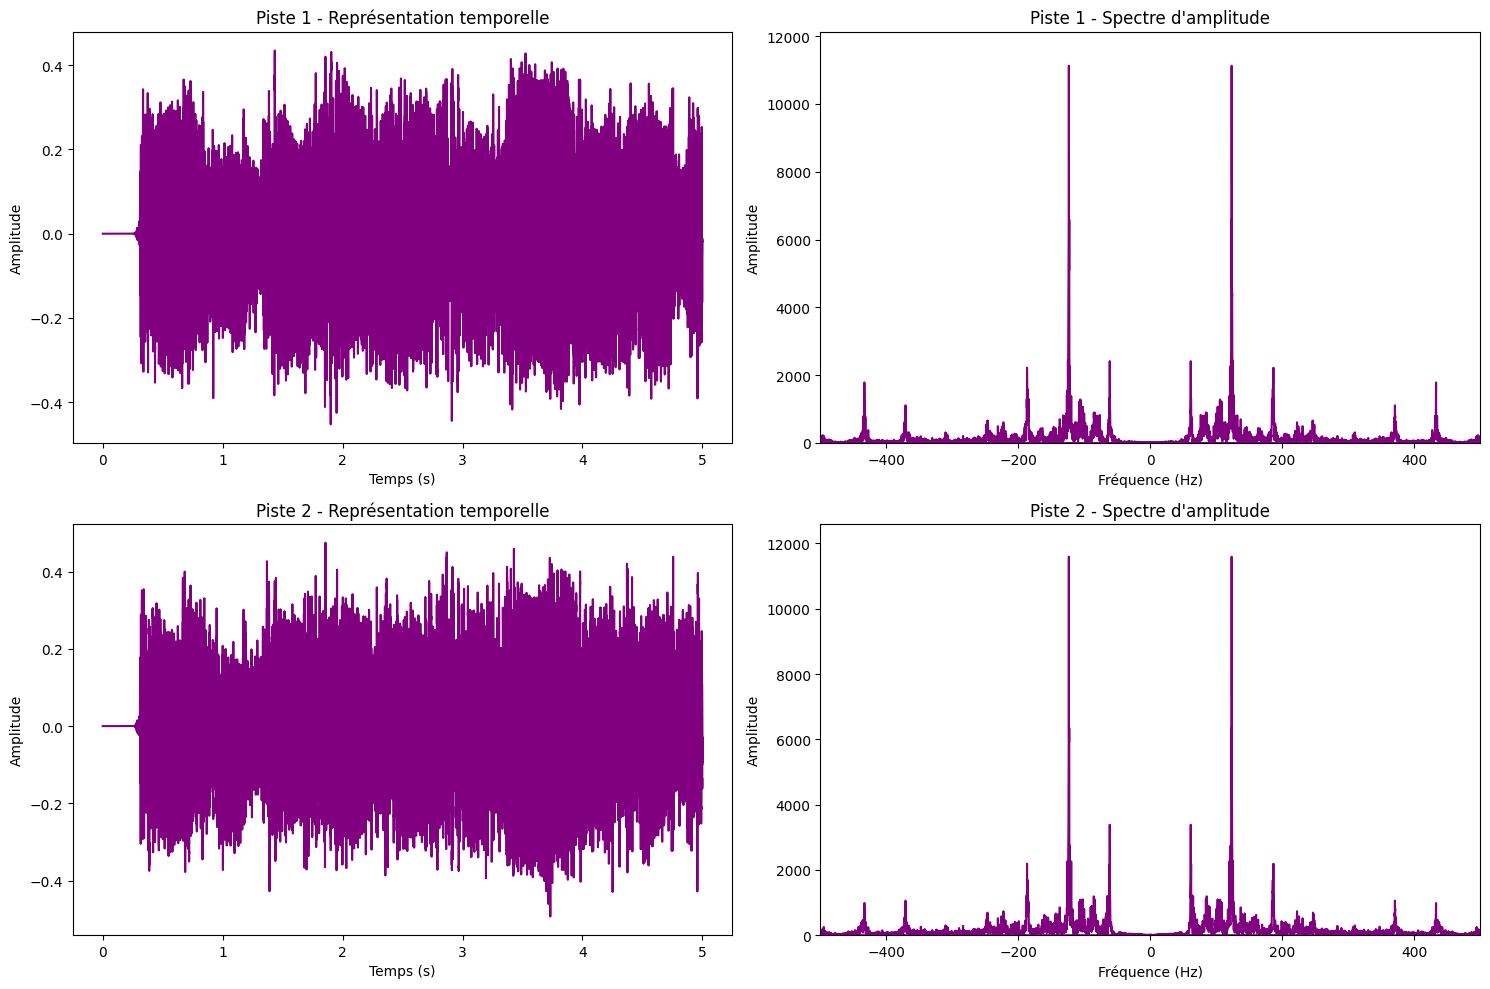

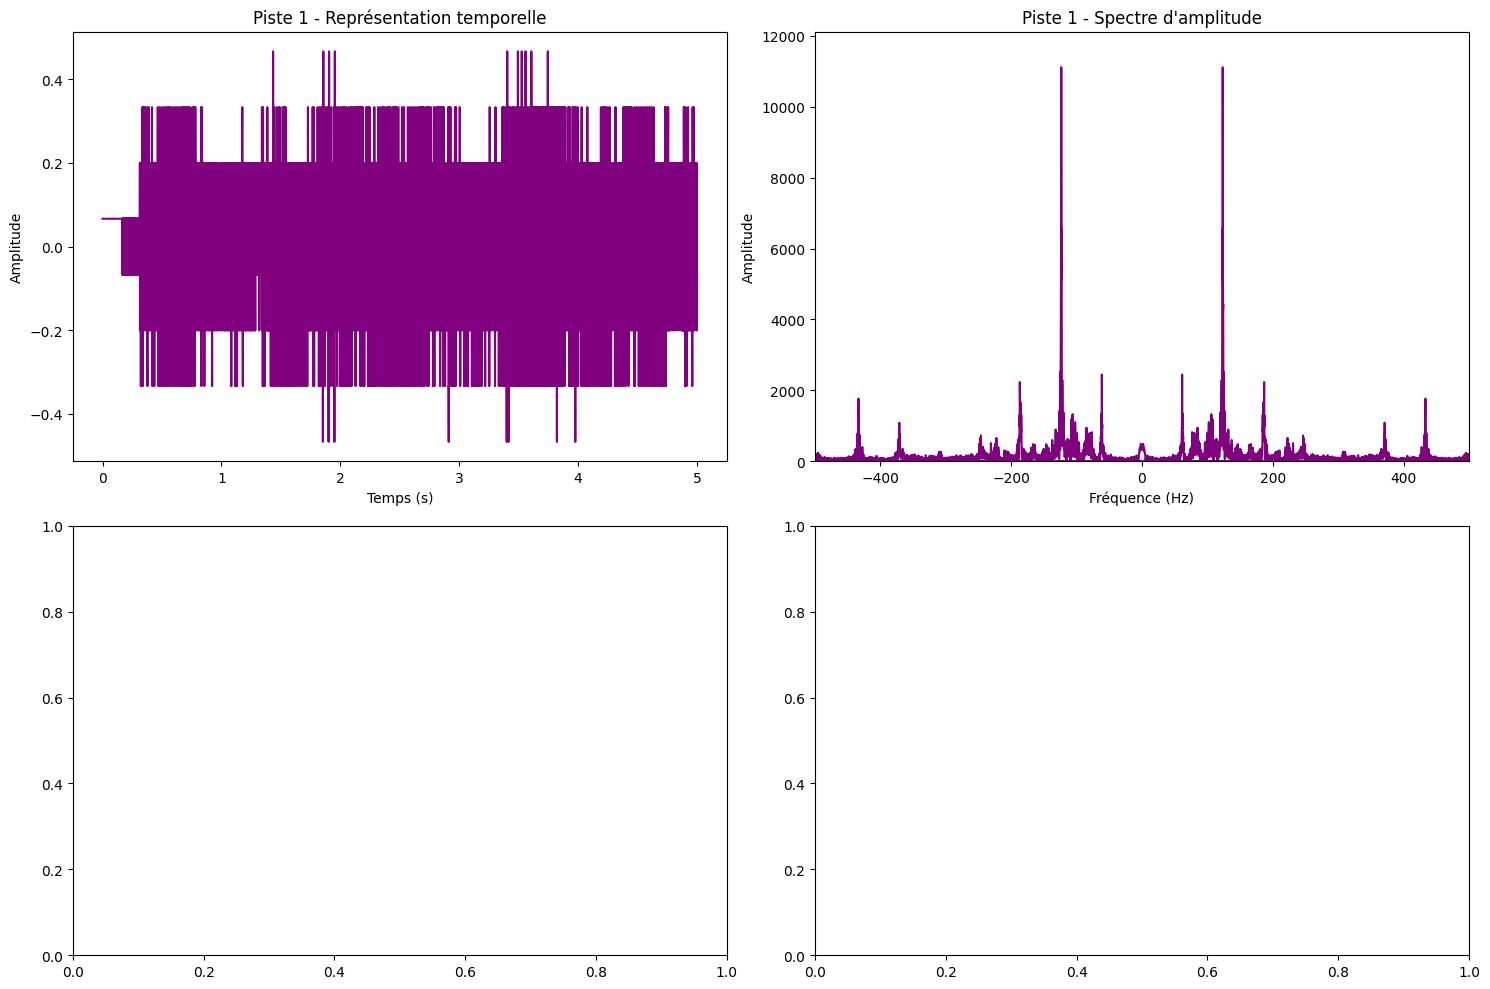

In [7]:
from function import *

fichier_audio_hd = "PF_HD_short.flac"
duree_extrait = 5

fichier_audio_sd = "PF_SD_short.flac"

extrait_audio_hd, frequence_echantillonnage_hd = extraire_morceau(
        fichier_audio_hd, duree_extrait)
extrait_audio_sd, frequence_echantillonnage_sd = extraire_morceau(
        fichier_audio_sd, duree_extrait)
afficher_pistes(extrait_audio_hd, frequence_echantillonnage_hd)
afficher_pistes(extrait_audio_sd, frequence_echantillonnage_sd)

On remarque bien que il y a un problème avec l'extrait audio, il n'affiche que une seule trame sur les 2. Il y a des pertes du signal.

<div style="border-top: 5px solid white;"></div>

<center>

# Réponse à la problématique

## un morceau HD est-il vraiment différent d’un format SD ?

Notre réponse est que Oui un fichier audio en <font color="orange">**HD**</font> est bien différent et il est plus clair comme on a pu le voir dans les graphes juste au-dessus ou le fichier audio en <font color="orange">**SD**</font> doit compresser le son ce qui le rend moins agréable à l'oreille.
</center>

<div style="border-top: 5px solid white;"></div>

<center>

# Function.py
</center>


<div style="border-top: 5px solid white;"></div>

In [ ]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from sounddevice import *
from pylab import *
import scipy.signal as sc 
from pydub import *
# function by Ruellet & Fouquet

def aff_flac(fichier):
    audio, frequence_echantillonnage = sf.read(fichier) # Charge le fichier audio FLAC
    
    # Obtenir les informations sur le fichier audio
    nombre_pistes = audio.shape[1] if len(audio.shape) > 1 else 1
    info_fichier = sf.info(fichier)
    nombre_bits_par_echantillon = info_fichier.bits if hasattr(info_fichier, "bits") else None
    nombre_echantillons = audio.shape[0]
    duree_totale = audio.shape[0] / frequence_echantillonnage
    
    # Afficher les caractéristiques
    print("Caractéristiques du fichier audio:", fichier)
    print("Fréquence d'échantillonnage :", frequence_echantillonnage, "Hz")
    print("Nombre de pistes :", nombre_pistes)
    if nombre_bits_par_echantillon is not None:
        print("Nombre de bits par échantillon :", nombre_bits_par_echantillon)
    print("Nombre d'échantillons :", nombre_echantillons)
    print("Durée totale :", duree_totale, "secondes")

# cette fonction est la même que celle juste au dessus mais avec elle je peux utiliser les valeurs que j'affiche dans la fonction au dessus
def obtenir_caracteristiques_audio(fichier):
    audio, frequence_echantillonnage = sf.read(fichier) # Charge le fichier audio FLAC
    
    # Obtenir les informations sur le fichier audio
    nombre_pistes = audio.shape[1] if len(audio.shape) > 1 else 1
    info_fichier = sf.info(fichier)
    nombre_bits_par_echantillon = info_fichier.bits if hasattr(info_fichier, "bits") else None
    nombre_echantillons = audio.shape[0]
    duree_totale = audio.shape[0] / frequence_echantillonnage
    
    # je créer un dictionnaire avec les caractéristiques pour une utilisation plus simple
    caracteristiques = {
        "fichier": fichier,
        "frequence_echantillonnage": frequence_echantillonnage,
        "nombre_pistes": nombre_pistes,
        "nombre_bits_par_echantillon": nombre_bits_par_echantillon,
        "nombre_echantillons": nombre_echantillons,
        "duree_totale": duree_totale
    }
    return caracteristiques

def lire_flac(fichier):
    audio, frequence_echantillonnage = sf.read(fichier) # Charge le fichier audio FLAC
    return audio, frequence_echantillonnage # Renvoye les données

def afficher_pistes(extrait_audio, frequence_echantillonnage):
    
    nombre_pistes = extrait_audio.shape[1] if len(extrait_audio.shape) > 1 else 1 # Obtenir les informations sur le nombre de pistes
    
    # Créer une grille de sous-graphes avec 2 lignes et 2 colonnes
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    # Piste 1
    piste1_audio = extrait_audio[:, 0] if nombre_pistes > 1 else extrait_audio
    axs[0, 0].plot(np.arange(len(piste1_audio)) / frequence_echantillonnage, piste1_audio, color='purple')
    axs[0, 0].set_title("Piste 1 - Représentation temporelle")
    axs[0, 0].set_xlabel("Temps (s)")
    axs[0, 0].set_ylabel("Amplitude")
    
    amplitudes_piste1 = np.abs(np.fft.fft(piste1_audio))
    frequences_piste1 = np.fft.fftfreq(len(piste1_audio), 1 / frequence_echantillonnage) 
    axs[0, 1].plot(frequences_piste1, amplitudes_piste1, color='purple')
    
    axs[0, 1].set_title("Piste 1 - Spectre d'amplitude")
    axs[0, 1].set_xlabel("Fréquence (Hz)")
    axs[0, 1].set_ylabel("Amplitude")
    axs[0, 1].set_xlim(-500, 500) # la fréquence min et max 
    axs[0, 1].set_ylim(0, np.max(amplitudes_piste1) + 1000) # amplitude min et max 
    
    # Piste 2
    if nombre_pistes > 1:
        piste2_audio = extrait_audio[:, 1]
        axs[1, 0].plot(np.arange(len(piste2_audio)) / frequence_echantillonnage, piste2_audio, color='purple')
        axs[1, 0].set_title("Piste 2 - Représentation temporelle")
        axs[1, 0].set_xlabel("Temps (s)")
        axs[1, 0].set_ylabel("Amplitude")
        
        amplitudes_piste2 = np.abs(np.fft.fft(piste2_audio))
        frequences_piste2 = np.fft.fftfreq(len(piste2_audio), 1 / frequence_echantillonnage) 
        axs[1, 1].plot(frequences_piste2, amplitudes_piste2, color='purple')
        
        axs[1, 1].set_title("Piste 2 - Spectre d'amplitude")
        axs[1, 1].set_xlabel("Fréquence (Hz)")
        axs[1, 1].set_ylabel("Amplitude")
        axs[1, 1].set_xlim(-500, 500) # la fréquence min et max 
        axs[1, 1].set_ylim(0, np.max(amplitudes_piste2) + 1000) # amplitude min et max 
    
    plt.tight_layout()
    plt.show()

def extraire_morceau(fichier, duree_extrait):
    audio, frequence_echantillonnage = sf.read(fichier) # Charge le fichier audio FLAC
    nombre_echantillons_extrait = int(duree_extrait * frequence_echantillonnage) # Calculer le nombre d'échantillons nécessaires pour l'extrait
    extrait = audio[:nombre_echantillons_extrait] # Extraire l'extrait voulu du fichier audio
    nom_nouveau_fichier = "extrait_" + str(duree_extrait) + "s_" + fichier # donner le nom du nouveau fichier avec l'extrait
    sf.write(nom_nouveau_fichier, extrait, frequence_echantillonnage) # Écrire l'extrait dans un nouveau fichier FLAC
    # print un message de confirmation et nous montre le nouveau nom du fichier
    print(f"Extrait de {duree_extrait} secondes du fichier audio a été extrait dans le fichier : {nom_nouveau_fichier}")
    return extrait, frequence_echantillonnage

def lire_piste(chemin_piste):
    # lit la piste, similaire lire_flac mais j'ai voulu différencier les deux fonctions car dans la phase I et la phase II elle s'utilise un peu différement.
    audio_data, sample_rate = sf.read(chemin_piste) 
    return audio_data, sample_rate

def sous_echantillonage(fic, echant, facteur):
    s_echant = echant / facteur # le sous échantillonage
    sf.write(fic, echant, s_echant) # la création d'un nouveau fichier .flac avec le sous échantillonnage
    return s_echant

# j'ai récupérer la fonction dans le utils206.py car elle marche bien nos besoins
def uniform_quantizer(s, niv, nmin, nmax):
    ''' quantification uniforme 
    sq, error = uniform_quantizer(s, niv, nmin, nmax):
    
    input : 
    - s : signal à quantifier
    - niv : nombre de niveaux de sortie
    - nmin : niveau minimal de sortie 
    - nmax : niveau maximal de sortie
    output : 
    - sq : signal quantifie
    - d: pas de quantification
    '''
    sq = empty(len(s))
    d = (nmax-nmin)/(niv-1)
    for i in range(len(s)):
        if s[i]>=nmax: 
            sq[i]=nmax
        elif s[i]<=nmin:
            sq[i]=nmin
        else :
            if niv % 2 == 0 :
                sq[i] = d * np.round((s[i]-d/2)/d) + (d/2)   
            else : 
                sq[i] = d * np.round(s[i]/d)        
    return sq, d

def ecrire_format_FLAC(pistes, sortie, frequence_echantillonnage):
    # vérifie si le nombre de pistes correspond bien au nombre de chemins en sortie.
    if len(pistes) != len(sortie):
        raise ValueError("Le nombre de pistes ne correspond pas au nombre de chemins de sortie.")
    # parcours la variables la longueur de la varible pistes 
    for i in range(len(pistes)):
        piste = pistes[i]
        nom_sortie = sortie[i]
        piste_normalisee = piste / np.max(np.abs(piste))# Normaliser la piste audio entre -1 et 1
        # Vérifie la dimension de la piste
        if len(piste_normalisee.shape) > 1:
            piste_normalisee = np.squeeze(piste_normalisee)
        sf.write(nom_sortie, piste_normalisee, frequence_echantillonnage)# Écrire la piste au format FLAC

def fusionner_pistes(piste1, piste2, chemin_sortie, freq):
    piste_fusionnee = np.concatenate((piste1, piste2), axis=0) # Concatène les données audio des deux pistes
    sf.write(chemin_sortie, piste_fusionnee, freq)# Écrire la piste fusionnée dans un fichier FLAC.
    # renvoi un message de confirmation pour être sur de ne pas avoir d'erreur.
    print("Fusion des pistes terminée. Le résultat est enregistré dans le fichier :", chemin_sortie)

def quantif(nom_fichier, bits):
    duree_extrait = 5
    # Extraire l'extrait du fichier audio
    extrait_audio, frequence_echantillonnage = extraire_morceau(
        nom_fichier, duree_extrait)
    cara = obtenir_caracteristiques_audio(nom_fichier) # stoke les caractéristique dans la variable cara (caractéristique).
    pistes = cara["nombre_pistes"] # récupère le nombre de piste 
    piste1_audio = extrait_audio[:, 0] if pistes > 1 else extrait_audio
    piste2_audio = extrait_audio[:, 1]
    # quantifie uniformément les 2 pistes.
    quant1 = uniform_quantizer(piste1_audio,bits,-1,1)
    quant2 = uniform_quantizer(piste2_audio,bits,-1,1)
    return quant1 , quant2, frequence_echantillonnage